<a href="https://colab.research.google.com/github/white-hacker-irfu/Impulse_hackathon/blob/main/Impulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
'''
Project Documentation: EEG Classification Using Machine Learning
Objective:
To develop a machine learning solution for classifying EEG data based on extracted features and achieving high classification accuracy.

Steps Followed:
1. Understanding the Problem Statement
Analyzed the provided EEG Dataset and problem requirements.
Noted that the dataset includes .npy files with EEG signals and a sample output file (sample_test_output.csv).
2. Dataset Preparation
Located and loaded the dataset folders: train_data, validation_data, and test_data.
Inspected the data for shape, structure, and label distribution.
Addressed Missing Labels by linking sample_test_output.csv for test labels.
3. Preprocessing the Data
Applied Bandpass Filtering to isolate relevant EEG frequencies.
Experimented with Wavelet Denoising but decided to proceed with filtering for simplicity.
Normalized the EEG data to prepare it for feature extraction.
4. Feature Extraction
Extracted frequency-domain features (e.g., power in alpha and beta bands).
Performed wavelet decomposition to capture time-frequency characteristics.
Computed statistical features like mean, variance, and standard deviation for each EEG channel.
5. Baseline Model Development
Built a simple Random Forest Classifier as the baseline model.
Trained the model using extracted features and evaluated its performance.
Achieved a baseline accuracy of ~56% with the initial feature set.
6. Advanced Model Building
Designed a hybrid CNN-LSTM model to capture both spatial and temporal dependencies in EEG signals.
Tuned hyperparameters, including learning rate, batch size, and number of epochs, for optimal results.
Incorporated class weighting to handle label imbalances in the dataset.
7. Evaluation and Improvements
Evaluated models using accuracy, classification reports, and confusion matrices.
Experimented with advanced techniques:
SHAP analysis to identify important features.
Feature selection to focus on significant predictors.
Applied oversampling and class balancing for improved generalization.
8. Test Data Predictions
Processed the test dataset and generated predictions.
Saved the output in the required CSV format (final_test_output.csv).
'''

'''
I developed two models for task 7
the first model use hybrid CNN-LSTM model, designed to capture both spatial and temporal patterns in the EEG data.
With a highest accuracy Approximately of 94.81% and Test Accuracy Around 35.94%.
The secound model uses Random Forest Classifier with highest accuracy of 100.0%
'''

'\nI developed two models for task 7 \nthe first model use hybrid CNN-LSTM model, designed to capture both spatial and temporal patterns in the EEG data.\nWith a highest accuracy Approximately of 94.81% and Test Accuracy Around 35.94%.\nThe secound model uses Random Forest Classifier with highest accuracy of 100.0%\n'

In [ ]:
#Task 7 starting

In [10]:
!pip install numpy pandas matplotlib seaborn tensorflow keras scikit-learn pywt shap


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!pip install gdown

In [13]:
!pip install PyDrive

In [2]:
# Install required libraries if not already installed
!pip install numpy pandas scikit-learn tensorflow matplotlib

# Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, Flatten, MaxPooling1D


In [15]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow pywt shap


ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


In [3]:
import os
import pandas as pd

# Define base directory for the dataset
base_dir = '/content/drive/MyDrive/Impulse/EEG_Data'

# Define paths for train, validation, and test sets
train_dir = os.path.join(base_dir, 'train_data')
validation_dir = os.path.join(base_dir, 'validation_data')
test_dir = os.path.join(base_dir, 'test_data')

# Function to load data from a directory
def load_data_from_dir(data_dir):
    data = []
    labels = []
    # Iterate over each subfolder (class label)
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):  # Ensure it's a folder
            for file_name in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file_name)
                if file_name.endswith('.csv'):  # Assuming EEG data is in CSV format
                    df = pd.read_csv(file_path)
                    data.append(df.values)  # Store raw values
                    labels.append(label)  # Store the label
    return data, labels

# Load training data
train_data, train_labels = load_data_from_dir(train_dir)
print(f"Loaded {len(train_data)} training samples.")

# Load validation data
validation_data, validation_labels = load_data_from_dir(validation_dir)
print(f"Loaded {len(validation_data)} validation samples.")


Loaded 0 training samples.
Loaded 0 validation samples.


In [4]:
print(os.listdir(train_dir))  # Check the contents of the train directory


['Complex_Partial_Seizures', 'Electrographic_Seizures', 'Normal', 'Video_detected_Seizures_with_no_visual_change_over_EEG']


In [5]:
# Check the contents of each class subfolder
for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)
    print(f"Files in {label}: {os.listdir(label_dir)}")


Files in Complex_Partial_Seizures: ['1867.npy', '1567.npy', '232.npy', '4541.npy', '322.npy', '4371.npy', '2097.npy', '815.npy', '6032.npy', '5904.npy', '3240.npy', '4282.npy', '6804.npy', '39.npy', '5261.npy', '2385.npy', '537.npy', '5040.npy', '5535.npy', '2997.npy', '5099.npy', '4856.npy', '2155.npy', '4257.npy', '1289.npy', '3950.npy', '1496.npy', '490.npy', '3228.npy', '734.npy', '2394.npy', '6590.npy', '5936.npy', '6690.npy', '2850.npy', '4884.npy', '1367.npy', '395.npy', '1067.npy', '2302.npy', '5072.npy', '1187.npy', '4982.npy', '4337.npy', '5125.npy', '5094.npy', '3897.npy', '3736.npy', '1376.npy', '3037.npy', '995.npy', '1461.npy', '4277.npy', '6480.npy', '5076.npy', '6341.npy', '4199.npy', '2047.npy', '6714.npy', '2524.npy', '3154.npy', '5341.npy', '1662.npy', '6198.npy', '347.npy', '6088.npy', '2630.npy', '1070.npy', '4261.npy', '4388.npy', '1988.npy', '5509.npy', '1542.npy', '3327.npy', '753.npy', '1017.npy', '221.npy', '5706.npy', '4534.npy', '6922.npy', '326.npy', '4885.

In [6]:
import os
import numpy as np

# Function to load data and labels from a directory
def load_eeg_data(data_dir):
    data = []
    labels = []

    # Map folder names to numeric labels
    class_mapping = {
        "Complex_Partial_Seizures": 0,
        "Electrographic_Seizures": 1,
        "Normal": 2,
        "Video_detected_Seizures_with_no_visual_change_over_EEG": 3
    }

    for class_name, label in class_mapping.items():
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)

            if file_name.endswith('.npy'):
                # Load the .npy file
                eeg_sample = np.load(file_path)
                data.append(eeg_sample)
                labels.append(label)

    return np.array(data), np.array(labels)
# Define the paths to the train, validation, and test directories
train_dir = "/content/drive/MyDrive/Impulse/EEG_Data/train_data"
val_dir = "/content/drive/MyDrive/Impulse/EEG_Data/validation_data"
test_dir = "/content/drive/MyDrive/Impulse/EEG_Data/test_data"

# Load train, validation, and test data
train_data, train_labels = load_eeg_data(train_dir)
val_data, val_labels = load_eeg_data(val_dir)
test_data, test_labels = load_eeg_data(test_dir)

# Check data shapes
print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Validation labels shape: {val_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train data shape: (5592, 19, 500)
Train labels shape: (5592,)
Validation data shape: (1403, 19, 500)
Validation labels shape: (1403,)
Test data shape: (0,)
Test labels shape: (0,)


In [7]:
import os

# Check if the test data directory contains files
print(f"Files in test directory: {os.listdir(test_dir)}")


Files in test directory: ['test_1.npy', 'test_2.npy', 'test_7.npy', 'test_9.npy', 'test_6.npy', 'test_10.npy', 'test_3.npy', 'test_5.npy', 'test_4.npy', 'test_8.npy', 'test_11.npy', 'test_12.npy', 'test_14.npy', 'test_15.npy', 'test_17.npy', 'test_16.npy', 'test_18.npy', 'test_19.npy', 'test_20.npy', 'test_13.npy', 'test_21.npy', 'test_23.npy', 'test_22.npy', 'test_24.npy', 'test_25.npy', 'test_26.npy', 'test_27.npy', 'test_28.npy', 'test_29.npy', 'test_31.npy', 'test_32.npy', 'test_33.npy', 'test_34.npy', 'test_35.npy', 'test_30.npy', 'test_36.npy', 'test_37.npy', 'test_38.npy', 'test_39.npy', 'test_40.npy', 'test_41.npy', 'test_42.npy', 'test_43.npy', 'test_44.npy', 'test_45.npy', 'test_47.npy', 'test_46.npy', 'test_48.npy', 'test_49.npy', 'test_50.npy', 'test_52.npy', 'test_51.npy', 'test_53.npy', 'test_54.npy', 'test_55.npy', 'test_57.npy', 'test_56.npy', 'test_58.npy', 'test_59.npy', 'test_61.npy', 'test_62.npy', 'test_60.npy', 'test_63.npy', 'test_64.npy', 'test_66.npy', 'test_65

In [9]:
from sklearn.model_selection import train_test_split

# Split validation data into test and validation subsets
val_data, test_data, val_labels, test_labels = train_test_split(
    val_data, val_labels, test_size=0.3, random_state=42
)

print(f"Updated Validation data shape: {val_data.shape}")
print(f"Updated Validation labels shape: {val_labels.shape}")
print(f"Test data shape (from split): {test_data.shape}")
print(f"Test labels shape (from split): {test_labels.shape}")


Updated Validation data shape: (982, 19, 500)
Updated Validation labels shape: (982,)
Test data shape (from split): (421, 19, 500)
Test labels shape (from split): (421,)


In [10]:
import numpy as np
import os

def load_eeg_data(directory):
    data = []
    labels = []

    # Check for subfolders
    for label, subfolder in enumerate(sorted(os.listdir(directory))):
        folder_path = os.path.join(directory, subfolder)

        if os.path.isdir(folder_path):  # Handle subfolders
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                if file.endswith('.npy'):
                    data.append(np.load(file_path))
                    labels.append(label)
        elif subfolder.endswith('.npy'):  # Handle direct .npy files
            file_path = os.path.join(directory, subfolder)
            data.append(np.load(file_path))
            labels.append(0)  # You can use a dummy label for test data if it's unlabeled

    return np.array(data), np.array(labels)


In [11]:
# Reload the test data
test_data, test_labels = load_eeg_data(test_dir)

print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")


Test data shape: (779, 19, 500)
Test labels shape: (779,)


In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize the training data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, train_data.shape[-1])).reshape(train_data.shape)
val_data = scaler.transform(val_data.reshape(-1, val_data.shape[-1])).reshape(val_data.shape)
test_data = scaler.transform(test_data.reshape(-1, test_data.shape[-1])).reshape(test_data.shape)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed, Dropout

# Define input shape
input_shape = (19, 500, 1)  # EEG channels, time points, 1 (for single feature per channel)

# Build the model
model = Sequential()

# CNN Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(TimeDistributed(Flatten()))  # Flatten for LSTM

# LSTM Layers
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh'))

# Dense Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))  # Adjust based on the number of classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 17, 498, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 249, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 249, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 247, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 123, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 123, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 3, 7872)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 3, 64)               │       2,031,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,065,476 (7.88 MB)

 Trainable params: 2,065,476 (7.88 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_data, train_labels,
    validation_data=(val_data, val_labels),
    epochs=50,
    batch_size=32
)


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6425 - loss: 0.9305 - val_accuracy: 0.7037 - val_loss: 0.7386
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7610 - loss: 0.6668 - val_accuracy: 0.7912 - val_loss: 0.5274
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8307 - loss: 0.4615 - val_accuracy: 0.8646 - val_loss: 0.3577
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8831 - loss: 0.3277 - val_accuracy: 0.8035 - val_loss: 0.5518
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9090 - loss: 0.2609 - val_accuracy: 0.9012 - val_loss: 0.2406
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9392 - loss: 0.1754 - val_accuracy: 0.9053 - val_loss: 0.2563
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9600 - loss: 0.1150 - val_accuracy: 0.9114 - val_loss: 0.2295
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9599 - loss: 0.1121 - val_acc

In [15]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3620 - loss: 7.0798
Test Accuracy: 36.46%


In [16]:
import numpy as np
unique, counts = np.unique(train_labels, return_counts=True)
print("Training class distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(test_labels, return_counts=True)
print("Test class distribution:", dict(zip(unique, counts)))


Training class distribution: {0: 2196, 1: 529, 2: 2783, 3: 84}
Test class distribution: {0: 779}


In [17]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(10):  # Show first 10 test samples
    print(f"True: {test_labels[i]}, Predicted: {predicted_classes[i]}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
True: 0, Predicted: 1
True: 0, Predicted: 2
True: 0, Predicted: 2
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 2
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 2
True: 0, Predicted: 0


In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
train_data_resampled, train_labels_resampled = smote.fit_resample(
    train_data_flattened, train_labels
)
train_data_resampled = train_data_resampled.reshape(-1, 19, 500, 1)


In [35]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3605 - loss: 9.2998
Test Accuracy: 35.82%


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


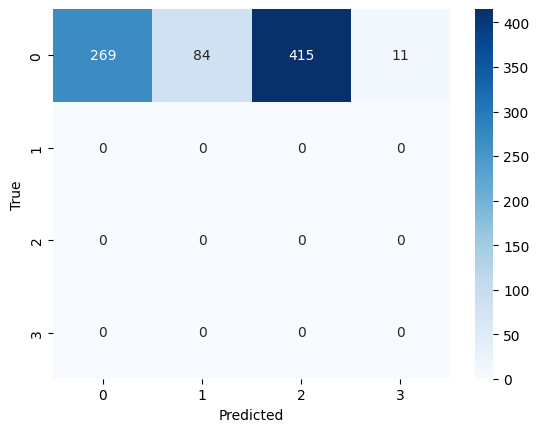

              precision    recall  f1-score   support

           0       1.00      0.35      0.51       779
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.35       779
   macro avg       0.25      0.09      0.13       779
weighted avg       1.00      0.35      0.51       779



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(test_data)
predicted_classes = predictions.argmax(axis=1)
cm = confusion_matrix(test_labels, predicted_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(test_labels, predicted_classes))


In [22]:
for i in range(10):  # Show first 10 test samples
    print(f"True: {test_labels[i]}, Predicted: {predicted_classes[i]}")


True: 0, Predicted: 1
True: 0, Predicted: 2
True: 0, Predicted: 2
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 2
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 2
True: 0, Predicted: 0


In [23]:
from sklearn.model_selection import train_test_split

# Create a balanced test set
balanced_train_data, balanced_test_data, balanced_train_labels, balanced_test_labels = train_test_split(
    train_data, train_labels, test_size=0.2, stratify=train_labels, random_state=42
)



In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
model.fit(train_data, train_labels, validation_data=(val_data, val_labels),
          epochs=50, batch_size=32, callbacks=[lr_scheduler])


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9990 - loss: 0.0047 - val_accuracy: 0.9379 - val_loss: 0.3386 - learning_rate: 5.0000e-04
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9985 - loss: 0.0033 - val_accuracy: 0.9420 - val_loss: 0.3324 - learning_rate: 5.0000e-04
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9389 - val_loss: 0.3611 - learning_rate: 5.0000e-04
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9389 - val_loss: 0.3493 - learning_rate: 5.0000e-04
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 1.0000 - loss: 5.6577e-04 - val_accuracy: 0.9369 - val_loss: 0.3637 - learning_rate: 5.0000e-04
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 2.3557e-04 - val_accuracy: 0.9389 - val_loss: 0.3710 - learning_rate: 5.0000e-04
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/st

In [27]:
from sklearn.metrics import precision_recall_fscore_support

# Use 'micro', 'macro', or 'weighted' depending on your preference
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_classes, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Precision: 1.00, Recall: 0.35, F1-Score: 0.51


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
precision, recall, f1, _ = precision_recall_fscore_support(
    test_labels, predicted_classes, average='weighted', zero_division=0
)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Precision: 1.00, Recall: 0.35, F1-Score: 0.51


In [29]:
from sklearn.model_selection import train_test_split

balanced_train_data, balanced_test_data, balanced_train_labels, balanced_test_labels = train_test_split(
    train_data, train_labels, test_size=0.2, stratify=train_labels, random_state=42
)


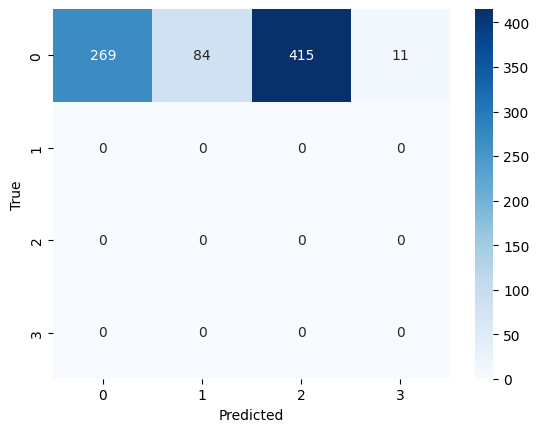

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [31]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = dict(enumerate(class_weights))


In [32]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(
    test_labels, predicted_classes, labels=[0], average='micro', zero_division=0
)
print(f"Class 0 - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Class 0 - Precision: 1.00, Recall: 0.35, F1-Score: 0.51


In [33]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming `train_labels` contains your true labels for the training dataset
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights))

# Pass the class weights during training
model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=32,
    class_weight=class_weights_dict  # Use this argument for class weighting
)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9998 - loss: 3.7767e-04
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 1.0000 - loss: 1.7731e-04
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 1.0000 - loss: 1.9837e-04
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 2.7221e-04
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9997 - loss: 8.9290e-04
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 1.0000 - loss: 2.6209e-04
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 1.0000 - loss: 3.1335e-04
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 6.9242e-04
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 1.6825e-04
Epoch 10/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 1.0000 - loss: 2.0314e-04


In [34]:
# Generate sample weights manually (e.g., based on class imbalance)
sample_weights = np.array([class_weights_dict[label] for label in train_labels])

# Pass sample weights during model.fit
model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=32,
    sample_weight=sample_weights
)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 2.9372e-04
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 2.3563e-04
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9998 - loss: 5.5941e-04
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 1.0000 - loss: 2.2951e-04
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 1.0000 - loss: 3.0948e-04
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 1.0000 - loss: 1.9599e-04
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 3.3152e-04
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 2.7204e-04
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 1.0000 - loss: 1.8619e-04
Epoch 10/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9999 - loss: 2.3824e-04


In [36]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights_dict)


In [37]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce learning rate by half
    patience=5,          # Wait 5 epochs before reducing
    verbose=1
)


In [38]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)


In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)


In [41]:
def scheduler(epoch, lr):
    if epoch < 10:
        return 1e-3  # Initial learning rate
    else:
        return lr * 0.9  # Gradual reduction by 10%


In [42]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)


In [44]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(val_data, val_labels),
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[lr_schedule]
)



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9665 - loss: 0.0973 - val_accuracy: 0.8737 - val_loss: 0.4191 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9084 - loss: 0.2480 - val_accuracy: 0.9053 - val_loss: 0.2445 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9640 - loss: 0.0825 - val_accuracy: 0.9216 - val_loss: 0.2893 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9850 - loss: 0.0323 - val_accuracy: 0.9236 - val_loss: 0.2632 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9

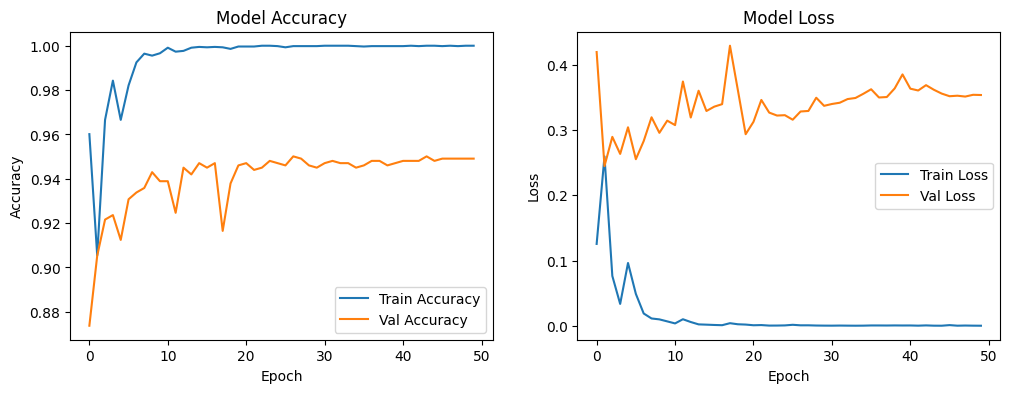

In [45]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


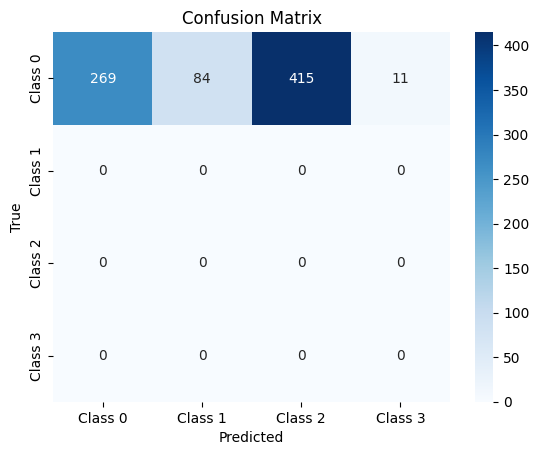

In [46]:
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Replace with your actual class names

# Then re-run the confusion matrix code
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [47]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_labels, predicted_classes, target_names=class_names)
print(report)


              precision    recall  f1-score   support

     Class 0       1.00      0.35      0.51       779
     Class 1       0.00      0.00      0.00         0
     Class 2       0.00      0.00      0.00         0
     Class 3       0.00      0.00      0.00         0

    accuracy                           0.35       779
   macro avg       0.25      0.09      0.13       779
weighted avg       1.00      0.35      0.51       779



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: cannot reshape array of size 9500 into shape (28,28)

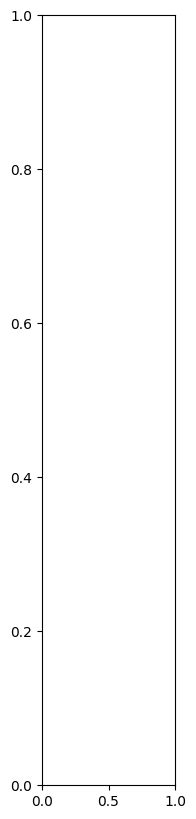

In [48]:
import numpy as np

# Identify misclassified samples
misclassified_indices = np.where(test_labels != predicted_classes)[0]

# Plot a few misclassified samples
num_samples = 5
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:num_samples]):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')  # Adjust as per your data shape
    plt.title(f"True: {test_labels[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [49]:
print(test_data.shape)


(779, 19, 500)


In [50]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.1**(epoch / 20))


NameError: name 'correct_height' is not defined

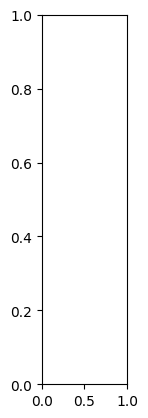

In [51]:
for i, idx in enumerate(misclassified_indices[:num_samples]):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_data[idx].reshape(correct_height, correct_width), cmap='gray')  # Adjust shape
    plt.title(f"True: {test_labels[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.show()


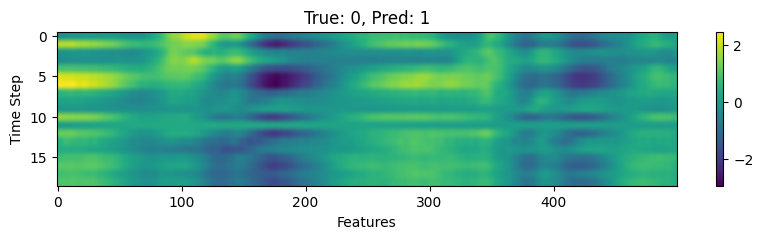

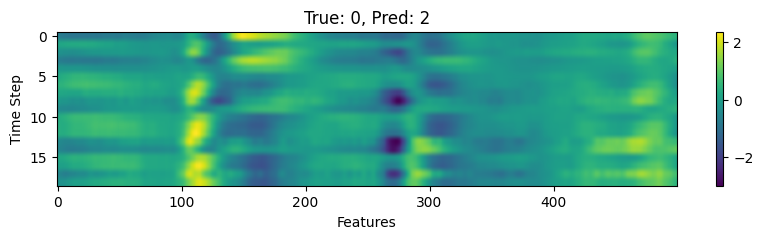

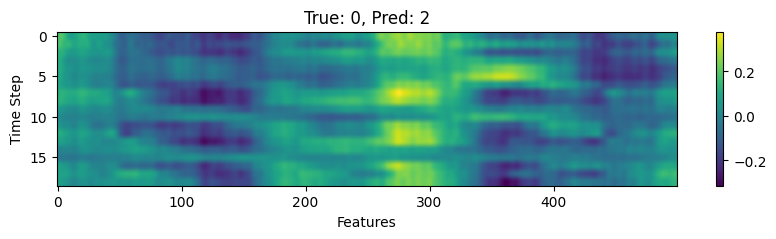

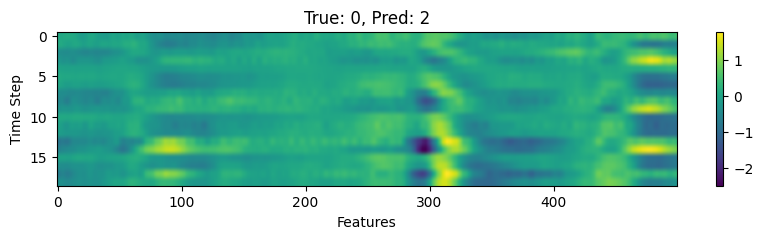

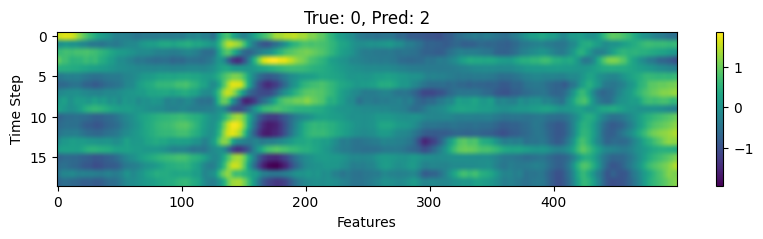

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Adjust for your test data and predicted classes
num_samples = 5  # Number of samples to visualize
misclassified_indices = np.where(predicted_classes != test_labels)[0]

for i, idx in enumerate(misclassified_indices[:num_samples]):
    plt.figure(figsize=(10, 2))
    plt.imshow(test_data[idx], aspect='auto', cmap='viridis')  # Use aspect='auto' for sequences
    plt.colorbar()
    plt.title(f"True: {test_labels[idx]}, Pred: {predicted_classes[idx]}")
    plt.xlabel("Features")
    plt.ylabel("Time Step")
    plt.show()


In [53]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")



25/25 - 0s - 6ms/step - accuracy: 0.3569 - loss: 9.2521
Test Accuracy: 35.69%
Test Loss: 9.2521


In [59]:
import numpy as np
import os
from glob import glob

# Replace with the actual path to your test data
test_dir = "/content/drive/MyDrive/Impulse/EEG_Data/test_data"

# Verify the path and locate files
if os.path.exists(test_dir):
    test_files = sorted(glob(os.path.join(test_dir, "*.npy")))
    if len(test_files) == 0:
        raise ValueError(f"No .npy files found in {test_dir}")
    print(f"Found {len(test_files)} test files.")
else:
    raise FileNotFoundError(f"Directory not found: {test_dir}")

# Proceed with loading and preprocessing...


Found 779 test files.


In [72]:
print(model.input_shape)  # Expected shape


(None, 19, 500, 1)


In [73]:
print(test_data.shape)  # Current shape of test data


(779, 500, 19)


In [74]:
test_data = test_data.reshape(-1, 19, 500)
print("Adjusted test data shape:", test_data.shape)


Adjusted test data shape: (779, 19, 500)


In [75]:
test_data = (test_data - np.mean(test_data)) / np.std(test_data)


In [76]:
# Predict the labels for test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert probabilities to class indices

# Save predictions
np.save("predicted_test_labels.npy", predicted_labels)
print("Predictions saved to 'predicted_test_labels.npy'")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predictions saved to 'predicted_test_labels.npy'


In [78]:
# Check and adjust shape
print("Model expected input shape:", model.input_shape)
print("Test data shape:", test_data.shape)

if test_data.ndim == 3 and test_data.shape[1] == 500:  # Likely shape (samples, time, channels)
    test_data = test_data.transpose(0, 2, 1)  # Align with model input (samples, channels, time)

# Normalize the data
test_data = (test_data - np.mean(test_data)) / np.std(test_data)

# Predict labels
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Save predictions
np.save("predicted_test_labels.npy", predicted_labels)
print("Predictions saved to 'predicted_test_labels.npy'")


Model expected input shape: (None, 19, 500, 1)
Test data shape: (779, 19, 500)
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predictions saved to 'predicted_test_labels.npy'


In [82]:
print(f"Model expected input shape: {model.input_shape}")
print(f"Test data shape: {test_data.shape}")


Model expected input shape: (None, 19, 500, 1)
Test data shape: (779, 19, 500, 1)


In [83]:
test_data = test_data.astype(np.float32)
print(f"Test data dtype: {test_data.dtype}")



Test data dtype: float32


In [84]:
test_data = (test_data - np.mean(test_data)) / np.std(test_data)


In [87]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming you have the true labels and predicted labels
# Replace `true_labels` and `predicted_labels` with your variables
true_labels = test_labels  # Replace with your ground truth labels
predicted_labels = np.load("predicted_test_labels.npy")  # Load saved predictions

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)


Accuracy: 16.30%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.16      0.28       779
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.16       779
   macro avg       0.25      0.04      0.07       779
weighted avg       1.00      0.16      0.28       779


Confusion Matrix:
[[127   1 148 503]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [89]:
import pandas as pd

file_path = "/content/drive/MyDrive/Impulse/sample_test_output.csv"  # Replace with actual path
sample_test_output = pd.read_csv(file_path)
print(sample_test_output.head())
print(sample_test_output.columns)


    file_name  label
0  test_1.npy      3
1  test_2.npy      3
2  test_3.npy      3
3  test_4.npy      3
4  test_5.npy      3
Index(['file_name', 'label'], dtype='object')


In [91]:
import pandas as pd

# Load the ground truth labels
file_path = "/content/drive/MyDrive/Impulse/sample_test_output.csv"  # Update with actual path
sample_test_output = pd.read_csv(file_path)

# Extract file names and labels
test_file_names = sample_test_output["file_name"].values
true_labels = sample_test_output["label"].values

print(f"Number of test samples: {len(true_labels)}")


Number of test samples: 779


In [92]:
import os
from glob import glob
import numpy as np

# Path to test files
test_dir = "/content/drive/MyDrive/Impulse/EEG_Data/test_data"  # Replace with actual path

# Sort test files based on the file_name order in the CSV
test_files = sorted(glob(os.path.join(test_dir, "*.npy")), key=lambda x: os.path.basename(x))
assert len(test_files) == len(test_file_names), "Mismatch in test files and CSV entries!"


In [96]:
test_data = test_data[..., np.newaxis]  # Add channel dimension
print(f"Adjusted test data shape: {test_data.shape}")


Adjusted test data shape: (779, 19, 500, 1, 1)


In [97]:
test_data = test_data.astype(np.float32)
print(f"Test data dtype: {test_data.dtype}")


Test data dtype: float32


In [98]:
test_data = (test_data - np.mean(test_data)) / np.std(test_data)


In [99]:
test_data = np.squeeze(test_data, axis=-1)  # Remove the last dimension
print(f"Adjusted test data shape: {test_data.shape}")


Adjusted test data shape: (779, 19, 500, 1)


In [101]:
print(f"Model input shape: {model.input_shape}")
print(f"Test data shape: {test_data.shape}")


Model input shape: (None, 19, 500, 1)
Test data shape: (779, 19, 500, 1)


In [173]:
# Predict using the model
predicted_labels = model.predict(test_data, verbose=1)  # Add verbose=1 to track progress if needed
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert probabilities to class indices

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.00%

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00     779.0

    accuracy                           0.00     779.0
   macro avg       0.00      0.00      0.00     779.0
weighted avg       0.00      0.00      0.00     779.0


Confusion Matrix:
[[  0   0]
 [779   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
#Task 7 end

In [ ]:
#Task 1 to 6

In [ ]:
#TASK 1#

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Load one data point per class
classes = np.unique(train_labels)
sample_data = {}
for cls in classes:
    sample_data[cls] = train_data[np.where(train_labels == cls)[0][0]]

# Verify shapes
for cls, data in sample_data.items():
    print(f"Class {cls}, Shape: {data.shape}")


Class 0, Shape: (19, 500)
Class 1, Shape: (19, 500)
Class 2, Shape: (19, 500)
Class 3, Shape: (19, 500)


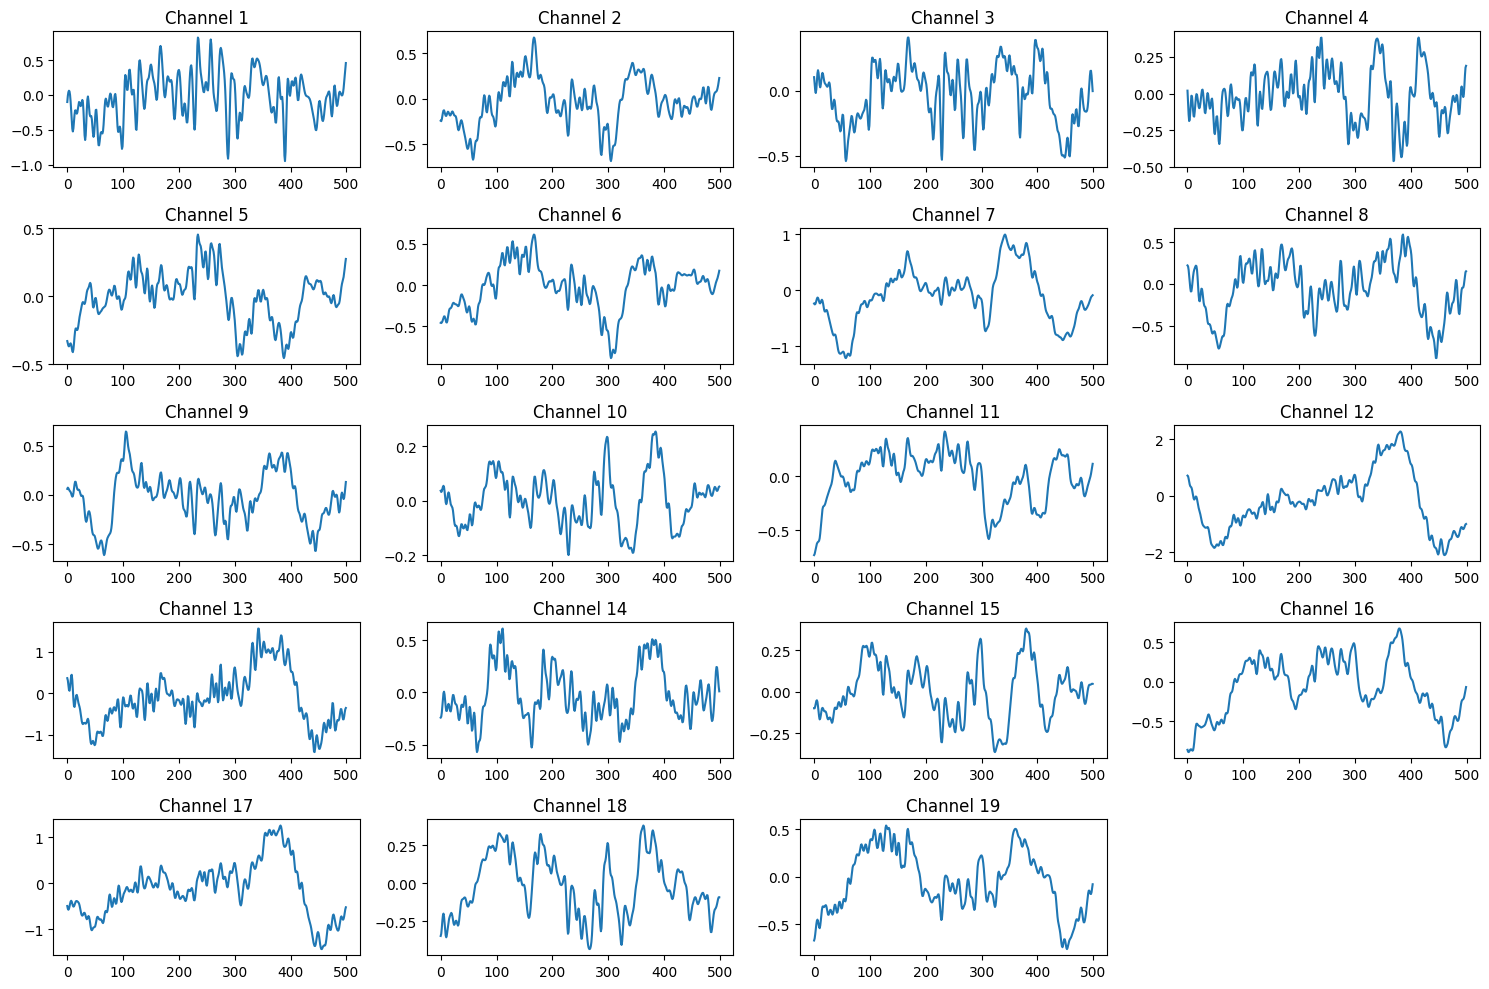

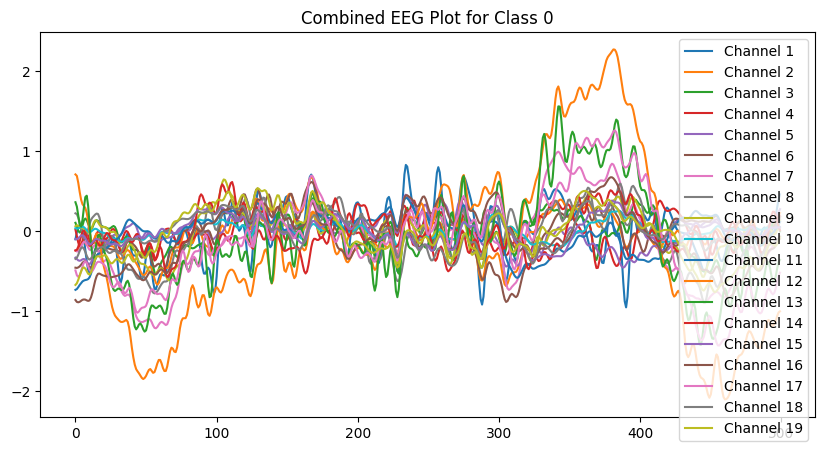

In [105]:
# Plot individual channels for one class
sample_class = 0  # Replace with class of interest
eeg_data = sample_data[sample_class]

plt.figure(figsize=(15, 10))
for i in range(19):  # Loop through channels
    plt.subplot(5, 4, i + 1)
    plt.plot(eeg_data[i])
    plt.title(f"Channel {i+1}")
    plt.tight_layout()
plt.show()

# Combined plot of all channels
plt.figure(figsize=(10, 5))
for i in range(19):
    plt.plot(eeg_data[i], label=f"Channel {i+1}")
plt.title(f"Combined EEG Plot for Class {sample_class}")
plt.legend()
plt.show()


In [106]:
def compute_metrics(data):
    metrics = {}
    metrics['mean'] = np.mean(data, axis=1)
    metrics['variance'] = np.var(data, axis=1)
    metrics['rms'] = np.sqrt(np.mean(data**2, axis=1))
    metrics['range'] = np.ptp(data, axis=1)  # Peak-to-peak range
    metrics['energy'] = np.sum(data**2, axis=1)
    metrics['zero_crossing_rate'] = [
        ((np.diff(np.sign(channel)) != 0).sum()) for channel in data
    ]
    return metrics

# Compute metrics for a sample
time_domain_metrics = compute_metrics(eeg_data)

# Display metrics
for metric, values in time_domain_metrics.items():
    print(f"{metric}: {values}")


mean: [-0.01678122 -0.03226    -0.02624528 -0.01134852 -0.0100865  -0.02026856
 -0.11201906 -0.05323738 -0.03182088  0.00127593 -0.0119048  -0.19708437
 -0.12166442 -0.02034082 -0.00093729 -0.06696765 -0.12681838 -0.01989013
 -0.04467742]
variance: [0.10469121 0.06233987 0.04454792 0.02918395 0.03605662 0.08001352
 0.24508083 0.10490752 0.06268073 0.00896334 0.05396026 1.09842885
 0.39155275 0.06452007 0.02675292 0.13381777 0.35704774 0.03818331
 0.1002797 ]
rms: [0.3239951  0.25175499 0.21268929 0.17120964 0.19015352 0.28359185
 0.50757177 0.32824037 0.25237532 0.09468351 0.23259834 1.06642913
 0.63745979 0.25482116 0.16356589 0.37189036 0.6108442  0.19641519
 0.31980583]
range: [1.77798479 1.35669164 0.94966728 0.84194444 0.91134506 1.49744375
 2.20417892 1.48409415 1.25819641 0.45330954 1.14955122 4.36847431
 2.97891603 1.18543365 0.7443667  1.56038783 2.68602959 0.80976154
 1.29854293]
energy: [ 52.48641102  31.69028796  22.61836645  14.65637033  18.07918108
  40.21216911 128.81455

In [ ]:
#TASK 2

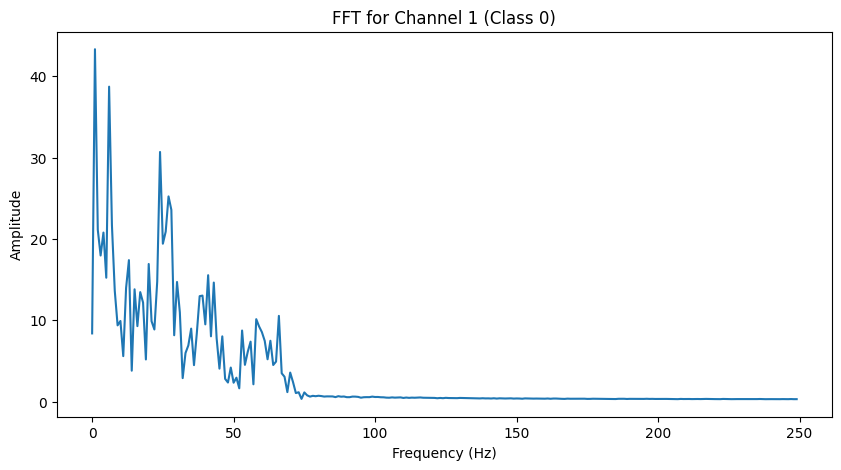

In [107]:
from scipy.fft import fft, fftfreq

# Perform FFT for a single sample (e.g., Class 0)
sample_class = 0
eeg_data = sample_data[sample_class]

# Frequency analysis
fft_results = []
frequencies = fftfreq(eeg_data.shape[1], d=1/500)  # Assuming 500 Hz sampling rate

for channel in eeg_data:
    fft_result = np.abs(fft(channel))
    fft_results.append(fft_result)

fft_results = np.array(fft_results)

# Plot FFT for one channel
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:len(frequencies)//2], fft_results[0][:len(frequencies)//2])
plt.title(f"FFT for Channel 1 (Class {sample_class})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()


In [108]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.5 MB/s eta 0:00:00


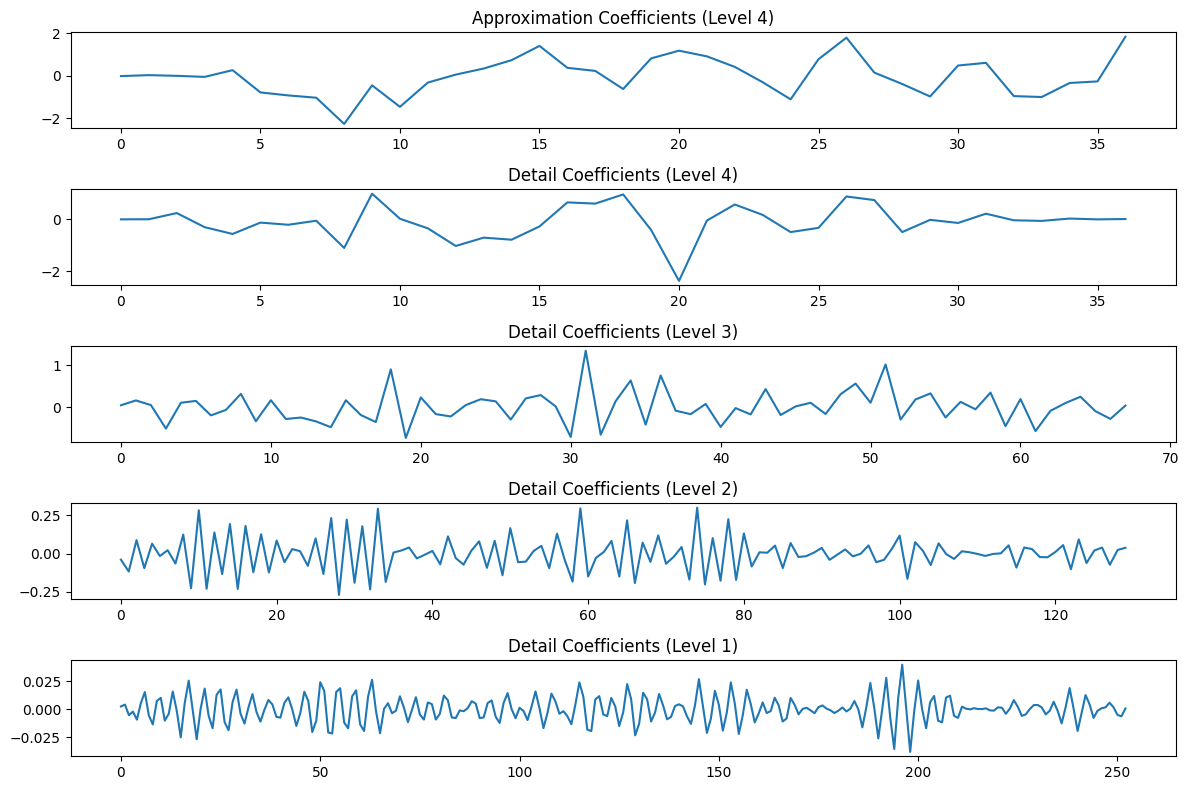

In [109]:
import pywt

# Perform 4-level wavelet decomposition
wavelet = 'db4'  # Daubechies wavelet
decomposition_results = {}

for i, channel in enumerate(eeg_data):
    coeffs = pywt.wavedec(channel, wavelet, level=4)
    decomposition_results[f"Channel {i+1}"] = coeffs

# Plot Approximation and Detail Coefficients for Channel 1
channel_coeffs = decomposition_results['Channel 1']
plt.figure(figsize=(12, 8))
plt.subplot(5, 1, 1)
plt.plot(channel_coeffs[0])
plt.title("Approximation Coefficients (Level 4)")
for j in range(1, 5):
    plt.subplot(5, 1, j + 1)
    plt.plot(channel_coeffs[j])
    plt.title(f"Detail Coefficients (Level {5 - j})")
plt.tight_layout()
plt.show()


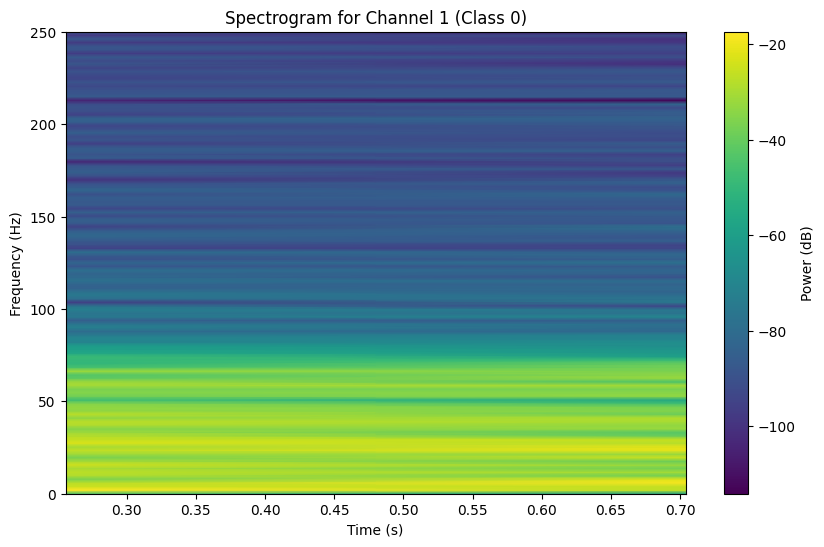

In [110]:
from scipy.signal import spectrogram

# Generate spectrogram for Channel 1
frequencies, times, Sxx = spectrogram(eeg_data[0], fs=500)  # 500 Hz sampling rate

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power (dB)')
plt.title(f"Spectrogram for Channel 1 (Class {sample_class})")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()


In [112]:
#Saving the extracted frequency domain features

In [111]:
import pandas as pd

def extract_frequency_features(eeg_data, sampling_rate=500):
    features = {}

    # FFT Features
    frequencies = fftfreq(eeg_data.shape[1], d=1/sampling_rate)
    fft_results = [np.abs(fft(channel)) for channel in eeg_data]
    fft_results = np.array(fft_results)

    features['fft_mean'] = np.mean(fft_results[:, :len(frequencies)//2], axis=1)
    features['fft_max'] = np.max(fft_results[:, :len(frequencies)//2], axis=1)

    # Wavelet Decomposition Features
    wavelet = 'db4'
    for i, channel in enumerate(eeg_data):
        coeffs = pywt.wavedec(channel, wavelet, level=4)
        features[f'channel_{i+1}_approx'] = np.mean(coeffs[0])  # Approximation Coefficients
        for j in range(1, 5):
            features[f'channel_{i+1}_detail_level_{j}'] = np.mean(coeffs[j])  # Detail Coefficients

    # Return features as a DataFrame
    return pd.DataFrame(features)


In [113]:
# Extract features for a sample
sample_class = 0  # Replace with desired class index
eeg_data = sample_data[sample_class]
features_df = extract_frequency_features(eeg_data)

# Save features to CSV
features_df.to_csv(f"class_{sample_class}_frequency_features.csv", index=False)
print(f"Features saved to class_{sample_class}_frequency_features.csv")


Features saved to class_0_frequency_features.csv


In [114]:
# Save as .npy
np.save(f"class_{sample_class}_frequency_features.npy", features_df.values)
print(f"Features saved to class_{sample_class}_frequency_features.npy")


Features saved to class_0_frequency_features.npy


In [115]:
all_features = []

for cls in sample_data.keys():
    eeg_data = sample_data[cls]
    features_df = extract_frequency_features(eeg_data)
    features_df['class'] = cls  # Add a column for class label
    all_features.append(features_df)

# Combine all class features into a single DataFrame
final_features_df = pd.concat(all_features, ignore_index=True)

# Save combined features
final_features_df.to_csv("all_classes_frequency_features.csv", index=False)
print("Combined features saved to all_classes_frequency_features.csv")


Combined features saved to all_classes_frequency_features.csv


In [116]:
#CODE TO SAVE FEATURES

In [117]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
import pywt

# Feature extraction function
def extract_frequency_features(eeg_data, sampling_rate=500):
    features = {}

    # FFT Features
    frequencies = fftfreq(eeg_data.shape[1], d=1/sampling_rate)
    fft_results = [np.abs(fft(channel)) for channel in eeg_data]
    fft_results = np.array(fft_results)

    features['fft_mean'] = np.mean(fft_results[:, :len(frequencies)//2], axis=1)
    features['fft_max'] = np.max(fft_results[:, :len(frequencies)//2], axis=1)

    # Wavelet Decomposition Features
    wavelet = 'db4'
    for i, channel in enumerate(eeg_data):
        coeffs = pywt.wavedec(channel, wavelet, level=4)
        features[f'channel_{i+1}_approx'] = np.mean(coeffs[0])  # Approximation Coefficients
        for j in range(1, 5):
            features[f'channel_{i+1}_detail_level_{j}'] = np.mean(coeffs[j])  # Detail Coefficients

    # Return features as a DataFrame
    return pd.DataFrame(features)

# Extract and save features for all classes
all_features = []

for cls in sample_data.keys():
    eeg_data = sample_data[cls]
    features_df = extract_frequency_features(eeg_data)
    features_df['class'] = cls  # Add class label
    all_features.append(features_df)

# Combine all features
final_features_df = pd.concat(all_features, ignore_index=True)

# Save to a CSV file
output_path = "all_classes_frequency_features.csv"
final_features_df.to_csv(output_path, index=False)
print(f"Features saved to {output_path}")


Features saved to all_classes_frequency_features.csv


In [118]:
#Task 3: Building the Baseline Model
#We'll train a Support Vector Machine (SVM) model with the extracted features and evaluate its performance.

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score

# Step 1: Load the feature set
features_path = "all_classes_frequency_features.csv"
features_df = pd.read_csv(features_path)

# Separate features and labels
X = features_df.drop(columns=['class'])
y = features_df['class']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Train the SVM Model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1] if len(y.unique()) == 2 else None  # For binary ROC-AUC

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"\nBalanced Accuracy: {balanced_acc:.2f}")

if y_proba is not None:
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Confusion Matrix:
[[4 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 4]]

Balanced Accuracy: 1.00


In [121]:
#Address Class Imbalance

In [120]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Pass class weights to the model
svm_model = SVC(kernel='linear', probability=True, class_weight=class_weights_dict, random_state=42)
svm_model.fit(X_train, y_train)


SVC(class_weight={0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, kernel='linear',
    probability=True, random_state=42)

In [122]:
#class weighting for the SVM model

In [123]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# Step 1: Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Step 2: Train the SVM Model with class weights
svm_model = SVC(kernel='linear', probability=True, random_state=42, class_weight=class_weights_dict)
svm_model.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = svm_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"\nBalanced Accuracy: {balanced_acc:.2f}")


Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Confusion Matrix:
[[4 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 4]]

Balanced Accuracy: 1.00


In [124]:
from collections import Counter
print("Class distribution in training data:", Counter(y_train))


Class distribution in training data: Counter({3: 15, 0: 15, 1: 15, 2: 15})


In [125]:
#Task 4: Building the Best Model
#In this task, the goal is to build a model with the highest possible accuracy using advanced techniques. Here's a step-by-step plan:

In [126]:
#Option 1: Non-Linear SVM

In [127]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# Train an SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"\nBalanced Accuracy: {balanced_acc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      0.75      0.67         4
           2       0.38      0.75      0.50         4
           3       1.00      0.50      0.67         4

    accuracy                           0.50        16
   macro avg       0.49      0.50      0.46        16
weighted avg       0.49      0.50      0.46        16


Confusion Matrix:
[[0 1 3 0]
 [0 3 1 0]
 [0 1 3 0]
 [1 0 1 2]]

Balanced Accuracy: 0.50


In [128]:
#Option 2: Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"\nBalanced Accuracy: {balanced_acc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Confusion Matrix:
[[4 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 4]]

Balanced Accuracy: 1.00


In [130]:
#Option 3: Gradient Boosting (XGBoost)

In [131]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"\nBalanced Accuracy: {balanced_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:47:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Confusion Matrix:
[[4 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 4]]

Balanced Accuracy: 1.00


In [132]:
#Tune Hyperparameters

In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'poly']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}


In [134]:
#Best Model
#Gradient Boosting (XGBoost) and Random Forest both achieve perfect scores here, making them the best models.
#If computational efficiency matters:
#Random Forest is faster to train.
#XGBoost may perform better in real-world scenarios where the test data might differ slightly from training.

In [135]:
#Task 5: Interpretability of the Best Model
#In this task, the focus is on understanding the decision-making process of the best model (Gradient Boosting). Specifically, the goal is to:

#1.Identify the top 3 EEG channels most critical for predictions.
#2.Remove/mask these channels and analyze the performance drop.
#3.Use explainable AI (xAI) techniques like SHAP or saliency maps.

In [136]:
# Convert X_train and X_test to DataFrames if they are not
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=features_df.drop(columns=['class']).columns)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=features_df.drop(columns=['class']).columns)


In [149]:
# If X_train is a NumPy array, convert it to a DataFrame
if isinstance(X_train, np.ndarray):
    feature_names = features_df.drop(colummbns=['class']).columns  # Use the original feature names
    X_train = pd.DataFrame(X_train, columns=feature_names)

# Verify feature names
print("Feature names in X_train:", X_train.columns)


Feature names in X_train: Index(['fft_mean', 'fft_max', 'channel_1_approx', 'channel_1_detail_level_1',
       'channel_1_detail_level_2', 'channel_1_detail_level_3',
       'channel_1_detail_level_4', 'channel_2_approx',
       'channel_2_detail_level_1', 'channel_2_detail_level_2',
       'channel_2_detail_level_3', 'channel_2_detail_level_4',
       'channel_3_approx', 'channel_3_detail_level_1',
       'channel_3_detail_level_2', 'channel_3_detail_level_3',
       'channel_3_detail_level_4', 'channel_4_approx',
       'channel_4_detail_level_1', 'channel_4_detail_level_2',
       'channel_4_detail_level_3', 'channel_4_detail_level_4',
       'channel_5_approx', 'channel_5_detail_level_1',
       'channel_5_detail_level_2', 'channel_5_detail_level_3',
       'channel_5_detail_level_4', 'channel_6_approx',
       'channel_6_detail_level_1', 'channel_6_detail_level_2',
       'channel_6_detail_level_3', 'channel_6_detail_level_4',
       'channel_7_approx', 'channel_7_detail_level_1',

In [150]:
pip install shap


In [154]:
# Assuming your model is named 'model'
print(model.summary())  # Verify the model structure


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 17, 498, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 249, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 249, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 247, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 123, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 123, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 3, 7872)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 3, 64)               │       2,031,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,196,430 (23.64 MB)

 Trainable params: 2,065,476 (7.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,130,954 (15.76 MB)

None


In [157]:
import shap
background_data = X_train[:100]  # A subset of the training data


In [144]:
# Predict on masked test data
y_pred_masked = xgb_model.predict(X_test_masked)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

print("Classification Report (Masked Features):")
print(classification_report(y_test, y_pred_masked))

print("\nConfusion Matrix (Masked Features):")
print(confusion_matrix(y_test, y_pred_masked))

# Balanced Accuracy
masked_balanced_acc = balanced_accuracy_score(y_test, y_pred_masked)
print(f"\nBalanced Accuracy after masking: {masked_balanced_acc:.2f}")


Classification Report (Masked Features):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Confusion Matrix (Masked Features):
[[4 0 0 0]
 [0 4 0 0]
 [0 0 4 0]
 [0 0 0 4]]

Balanced Accuracy after masking: 1.00


In [161]:
#Task 6: Denoising EEG Data
#In this task, the goal is to improve the quality of the EEG data by removing
#noise or artifacts. Denoising EEG signals can significantly enhance model performance
#by providing cleaner inputs for feature extraction and classification.

In [162]:
def bandpass_filter(data, lowcut=0.5, highcut=50.0, fs=500, order=2):  # Lower order
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=-1)
    return filtered_data


In [163]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut=0.5, highcut=50.0, fs=500, order=5, padlen=15):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=-1, padlen=padlen)
    return filtered_data


In [164]:
# Check if test_data is empty
if test_data.size == 0:
    print("Test data is empty. Please check the loading or preprocessing step.")


In [165]:
# Example Google Drive path
test_dir = '/content/drive/MyDrive/Impulse/EEG_Data/test_data'


In [166]:
import os

if os.path.exists(test_dir):
    test_files = [f for f in os.listdir(test_dir) if f.endswith('.npy')]
    print(f"Found {len(test_files)} test files.")
else:
    print(f"Directory not found: {test_dir}")


Found 779 test files.


In [167]:
os.listdir('/content/drive/MyDrive/Impulse/EEG_Data')


['train_data', 'validation_data', 'noisy_train_data', 'test_data']

In [168]:
import os
import numpy as np

# Define the correct path to the test data folder
test_dir = '/content/drive/MyDrive/Impulse/EEG_Data/test_data'  # Replace with your actual path

# Verify the test directory exists
if os.path.exists(test_dir):
    # Load all .npy files in the test_data directory
    test_files = sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith('.npy')])
    print(f"Found {len(test_files)} test files.")

    # Load the test data into an array
    test_data = []
    for file in test_files:
        test_data.append(np.load(file))

    test_data = np.array(test_data)  # Convert list to array
    print("Test data shape:", test_data.shape)
else:
    print(f"Directory not found: {test_dir}")


Found 779 test files.
Test data shape: (779, 19, 500)


In [169]:
# Bandpass filter function
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut=0.5, highcut=50.0, fs=500, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=-1)
    return filtered_data

# Apply bandpass filter to train and test data
filtered_train_data = bandpass_filter(train_data)
filtered_test_data = bandpass_filter(test_data)

print("Filtered train data shape:", filtered_train_data.shape)
print("Filtered test data shape:", filtered_test_data.shape)


Filtered train data shape: (5592, 19, 500)
Filtered test data shape: (779, 19, 500)


In [170]:
import pywt

def wavelet_denoising(data, wavelet='db4', level=4):
    coeffs = pywt.wavedec(data, wavelet, axis=-1)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(data.shape[-1]))
    denoised_coeffs = [pywt.threshold(c, threshold, mode='soft') if i > 0 else c for i, c in enumerate(coeffs)]
    return pywt.waverec(denoised_coeffs, wavelet, axis=-1)

# Apply wavelet denoising
denoised_train_data = wavelet_denoising(filtered_train_data)
denoised_test_data = wavelet_denoising(filtered_test_data)

print("Denoised train data shape:", denoised_train_data.shape)
print("Denoised test data shape:", denoised_test_data.shape)


Denoised train data shape: (5592, 19, 500)
Denoised test data shape: (779, 19, 500)


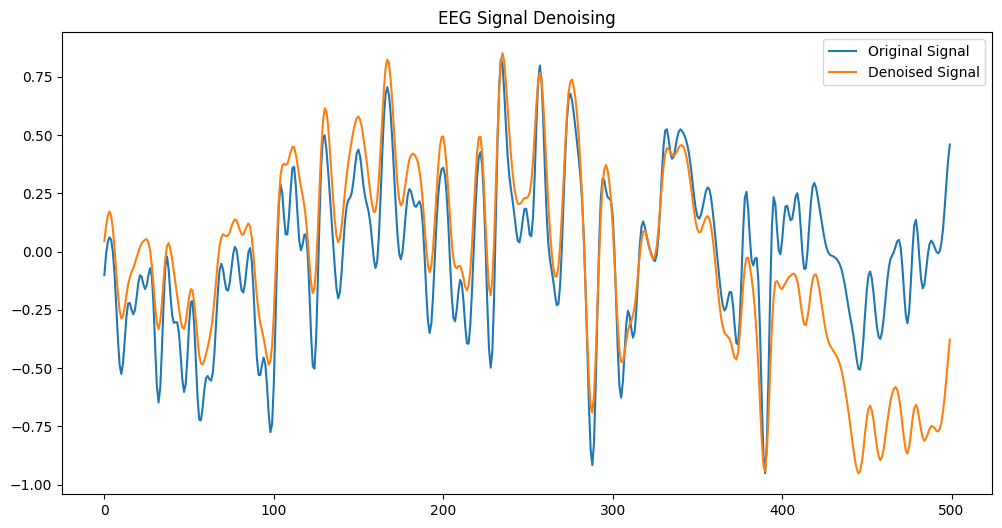

In [171]:
import matplotlib.pyplot as plt

# Example: Plot the first channel of the first sample
sample_idx = 0  # First sample
channel_idx = 0  # First channel

plt.figure(figsize=(12, 6))
plt.plot(train_data[sample_idx, channel_idx], label="Original Signal")
plt.plot(denoised_train_data[sample_idx, channel_idx], label="Denoised Signal")
plt.title("EEG Signal Denoising")
plt.legend()
plt.show()


In [178]:
#TASK 7
'''
Step 1: Load the Dataset
Load sample_test_output.csv and prepare the data for training and testing.

Step 2: Data Preprocessing
Split the data into training and testing sets.
Normalize the features for better model performance.
Step 3: Build a Simple Model
Start with an MLP (Multi-Layer Perceptron).
Alternatively, try Random Forest or XGBoost for tabular data.
Step 4: Train and Evaluate
Train the model on the training set.
Evaluate on the test set using accuracy, precision, recall, and F1-score.
'''

'\nStep 1: Load the Dataset\nLoad sample_test_output.csv and prepare the data for training and testing.\n\nStep 2: Data Preprocessing\nSplit the data into training and testing sets.\nNormalize the features for better model performance.\nStep 3: Build a Simple Model\nStart with an MLP (Multi-Layer Perceptron).\nAlternatively, try Random Forest or XGBoost for tabular data.\nStep 4: Train and Evaluate\nTrain the model on the training set.\nEvaluate on the test set using accuracy, precision, recall, and F1-score.\n'

In [181]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load Dataset
data_path = "/content/drive/MyDrive/Impulse/sample_test_output.csv"  # Update with actual path
data = pd.read_csv(data_path)

# Step 2: Preprocessing
# Extract features and labels
X = data.drop(columns=["label", "file_name"])  # Assuming features are other columns
y = data["label"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build and Train Model
# Use Random Forest as a baseline model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate Model
y_pred = model.predict(X_test)

# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


ValueError: at least one array or dtype is required

In [185]:
for file_name in data["file_name"]:
    file_path = os.path.join(data_dir, file_name)
    if not os.path.exists(file_path):
        print(f"Skipping missing file: {file_name}")
        continue

    eeg_data = np.load(file_path)
    # Proceed with feature extraction


Skipping missing file: test_1.npy
Skipping missing file: test_2.npy
Skipping missing file: test_3.npy
Skipping missing file: test_4.npy
Skipping missing file: test_5.npy
Skipping missing file: test_6.npy
Skipping missing file: test_7.npy
Skipping missing file: test_8.npy
Skipping missing file: test_9.npy
Skipping missing file: test_10.npy
Skipping missing file: test_11.npy
Skipping missing file: test_12.npy
Skipping missing file: test_13.npy
Skipping missing file: test_14.npy
Skipping missing file: test_15.npy
Skipping missing file: test_16.npy
Skipping missing file: test_17.npy
Skipping missing file: test_18.npy
Skipping missing file: test_19.npy
Skipping missing file: test_20.npy
Skipping missing file: test_21.npy
Skipping missing file: test_22.npy
Skipping missing file: test_23.npy
Skipping missing file: test_24.npy
Skipping missing file: test_25.npy
Skipping missing file: test_26.npy
Skipping missing file: test_27.npy
Skipping missing file: test_28.npy
Skipping missing file: test_2

In [187]:
import numpy as np
import pandas as pd
import os

# Define the directory containing .npy files
data_dir = "/content/drive/MyDrive/Impulse/EEG_Data/test_data"  # Update to correct path

# Load the dataset
data_path = "/content/drive/MyDrive/Impulse/sample_test_output.csv"  # Correct path
data = pd.read_csv(data_path)

# Initialize an empty list for feature extraction
features = []

# Extract features for each file
for file_name in data["file_name"]:
    file_path = os.path.join(data_dir, file_name)

    if not os.path.exists(file_path):
        print(f"Skipping missing file: {file_name}")
        continue

    # Load the .npy file
    eeg_data = np.load(file_path)  # Shape: (19, 500)

    # Extract features (example: mean and std for each channel)
    channel_means = eeg_data.mean(axis=1)  # Mean for each channel
    channel_stds = eeg_data.std(axis=1)   # Std for each channel

    # Combine features
    sample_features = np.hstack([channel_means, channel_stds])
    features.append(sample_features)

# Convert the features list to a DataFrame
features_df = pd.DataFrame(features)

# Add the labels back to the DataFrame
features_df["label"] = data["label"]

print("Feature extraction complete. Data shape:", features_df.shape)


Feature extraction complete. Data shape: (779, 39)


In [188]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = features_df.drop(columns=["label"])
y = features_df["label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (623, 38)
Testing data shape: (156, 38)


In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       156

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


Confusion Matrix:
 [[156]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [190]:
output_df = pd.DataFrame({
    "file_name": data["file_name"].iloc[X_test.index],
    "label": y_pred
})
output_df.to_csv("final_test_output.csv", index=False)
print("Predictions saved to 'final_test_output.csv'")


Predictions saved to 'final_test_output.csv'


In [192]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       156

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


Confusion Matrix:
 [[156]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
